(1) Packages

In [ ]:
! pip install langchain_community tiktoken langchain-openai langchainhub chromadb langchain

(2) LangSmith

https://docs.smith.langchain.com/

In [ ]:
import os
os.environ['LANGCHAIN_TRACING_V2'] = 'true'
os.environ['LANGCHAIN_ENDPOINT'] = 'https://api.smith.langchain.com'
os.environ['LANGCHAIN_API_KEY'] = <your-api-key>

(3) API Keys

In [ ]:
os.environ['OPENAI_API_KEY'] = <your-api-key>

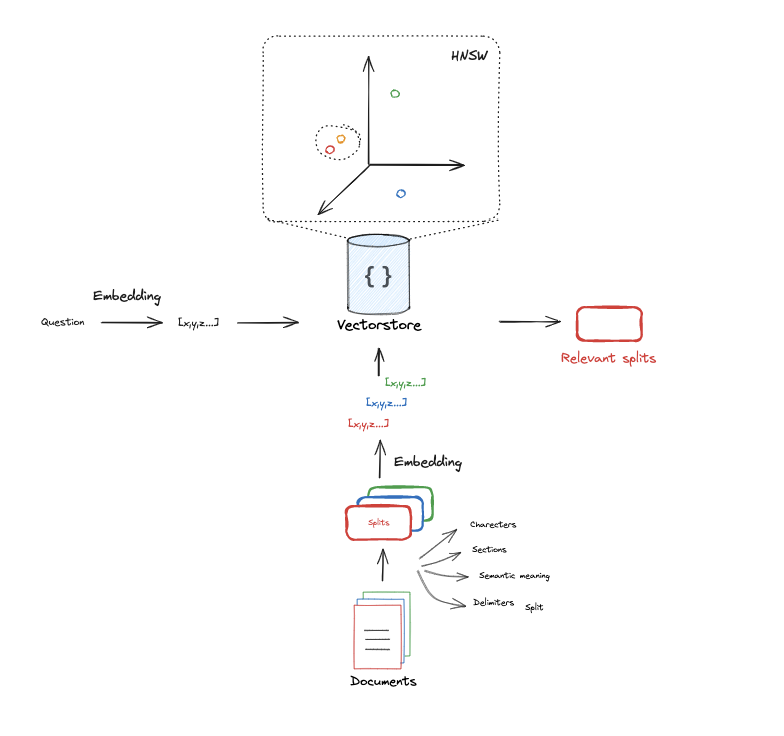

In [ ]:
# Documents
question = "What kinds of pets do I like?"
document = "My favorite pet is a cat."

[Count tokens](https://github.com/openai/openai-cookbook/blob/main/examples/How_to_count_tokens_with_tiktoken.ipynb)  considering [~4 char / token](https://help.openai.com/en/articles/4936856-what-are-tokens-and-how-to-count-them)

In [ ]:
import tiktoken

def num_tokens_from_string(string: str, encoding_name: str) -> int:
    """Returns the number of tokens in a text string."""
    encoding = tiktoken.get_encoding(encoding_name)
    num_tokens = len(encoding.encode(string))
    return num_tokens

num_tokens_from_string(question, "cl100k_base")

[Text embedding models](https://python.langchain.com/docs/integrations/text_embedding/openai)

In [ ]:
from langchain_openai import OpenAIEmbeddings
embd = OpenAIEmbeddings()
query_result = embd.embed_query(question)
document_result = embd.embed_query(document)
len(query_result)

[Cosine similarity](https://platform.openai.com/docs/guides/embeddings/frequently-asked-questions) is reccomended (1 indicates identical) for OpenAI embeddings.

In [ ]:
import numpy as np

def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    return dot_product / (norm_vec1 * norm_vec2)

similarity = cosine_similarity(query_result, document_result)
print("Cosine Similarity:", similarity)

[Document Loaders](https://python.langchain.com/docs/integrations/document_loaders/)

In [ ]:
#### INDEXING ####

# Load blog
import bs4
from langchain_community.document_loaders import WebBaseLoader
loader = WebBaseLoader(
    web_paths=("https://lilianweng.github.io/posts/2023-06-23-agent/",),
    bs_kwargs=dict(
        parse_only=bs4.SoupStrainer(
            class_=("post-content", "post-title", "post-header")
        )
    ),
)
blog_docs = loader.load()

In [ ]:
# Split
from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=300, 
    chunk_overlap=50)

# Make splits
splits = text_splitter.split_documents(blog_docs)

[Vector stores](https://python.langchain.com/docs/integrations/vectorstores/)

In [ ]:
# Index
from langchain_openai import OpenAIEmbeddings
from langchain_community.vectorstores import Chroma
vectorstore = Chroma.from_documents(documents=splits, 
                                    embedding=OpenAIEmbeddings())

retriever = vectorstore.as_retriever()